# Import Libraries

In [20]:
import pandas as pd
import plotly.express as px

# Load Prediction DataFrames

In [21]:
results_folder = 'experiments/results'
models = [
    'gaf-vit',
    'forcnn-resnet',
    'tft',
    'nbeats',
    'nhits'
]
large_predictions_filenames = 'large_predictions.csv'
small_predictions_filenames = 'small_predictions.csv'
datasets = [
    ('Binance', 'FILUSDT'),
    ('Bitbay', 'ETHUSD'),
    ('Bittrex', 'BTCUSDT'),
    ('CEX', 'BNBUSD'),
    ('Exmo', 'DOGEUSD'),
    ('Exmo', 'TRXUSD'),
    ('Poloniex', 'ADAUSDT'),
    ('Poloniex', 'DAIUSDT'),
]

In [30]:
dfs_list = []
for i, model_name in enumerate(models):
    df = pd.read_csv(f'{results_folder}/{model_name}/{large_predictions_filenames}')
    df['model'] = model_name
    dfs_list.append(df)

    if i == 0:
        df_copy = df.copy()
        df_copy['model'] = 'actual'
        df_copy['pred_price'] = df_copy['actual_price']
        dfs_list.append(df_copy)
    
large_df = pd.concat(dfs_list, axis=0)
large_df.head()

exchange   symbol  pred_price  actual_price    model
0  Binance  FILUSDT   30.400729       30.3230  gaf-vit
1  Binance  FILUSDT   30.348585       30.5754  gaf-vit
2  Binance  FILUSDT   30.601198       30.4246  gaf-vit
3  Binance  FILUSDT   30.450271       29.0085  gaf-vit
4  Binance  FILUSDT   29.032976       29.8579  gaf-vit

In [31]:
dfs_list = []
for i, model_name in enumerate(models):
    df = pd.read_csv(f'{results_folder}/{model_name}/{small_predictions_filenames}')
    df['model'] = model_name
    dfs_list.append(df)

    if i == 0:
        df_copy = df.copy()
        df_copy['model'] = 'actual'
        df_copy['pred_price'] = df['actual_price']
        dfs_list.append(df_copy)
    
small_df = pd.concat(dfs_list, axis=0)
small_df.head()

exchange   symbol  pred_price  actual_price    model
0  Binance  FILUSDT   30.374128       30.3230  gaf-vit
1  Binance  FILUSDT   30.322028       30.5754  gaf-vit
2  Binance  FILUSDT   30.574420       30.4246  gaf-vit
3  Binance  FILUSDT   30.423626       29.0085  gaf-vit
4  Binance  FILUSDT   29.007572       29.8579  gaf-vit

# Plot Actual Price & Prediction for each Model

In [32]:
def generate_prediction_plots(df: pd.DataFrame, title: str):
    for (exchange, symbol), group in df.groupby(['exchange', 'symbol']):
        if (exchange, symbol) not in datasets:
            continue
        
        fig = px.line(
            group, 
            y='pred_price', 
            color='model',
            labels={'value': 'Price', 'variable': 'Price Type'}, 
            title=f'Actual vs Predicted Prices for {exchange}:{symbol} - {title}-scale Dataset'
        )
        fig.update_layout(xaxis_title='Time Step', yaxis_title='Price', legend_title='Model')
        fig.show()

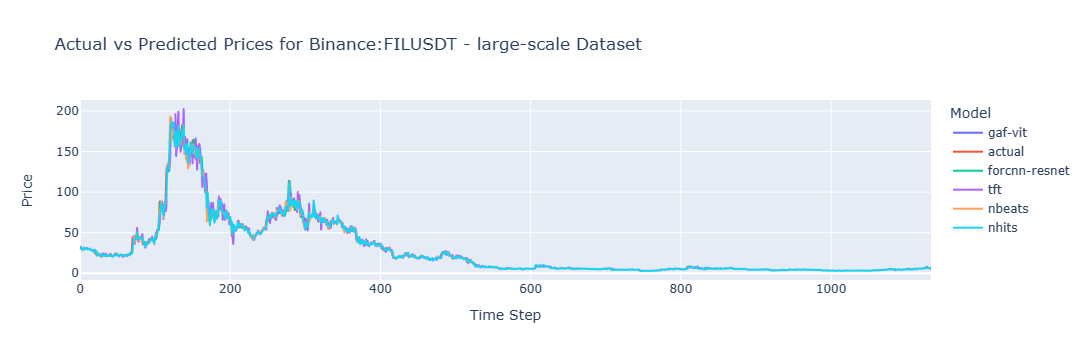

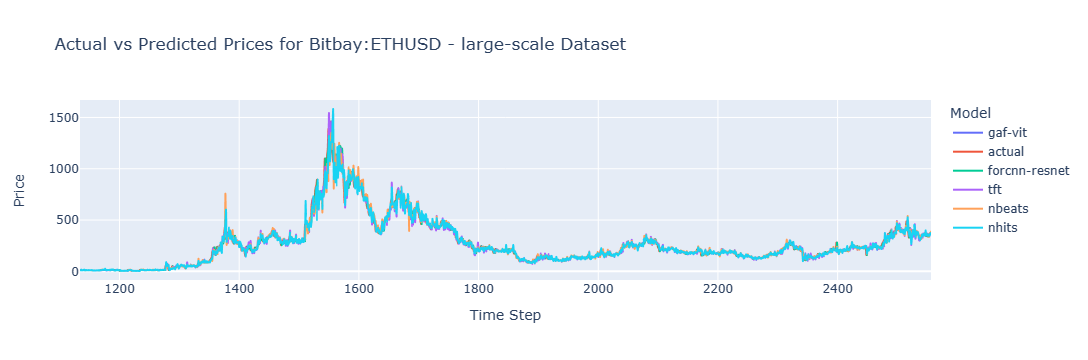

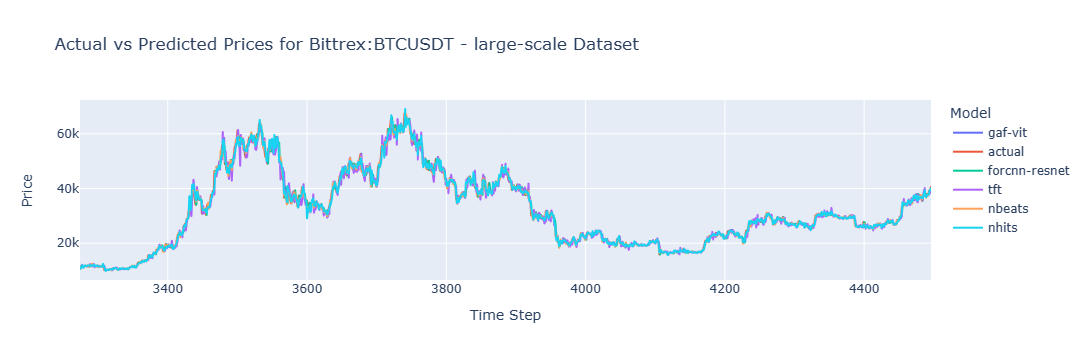

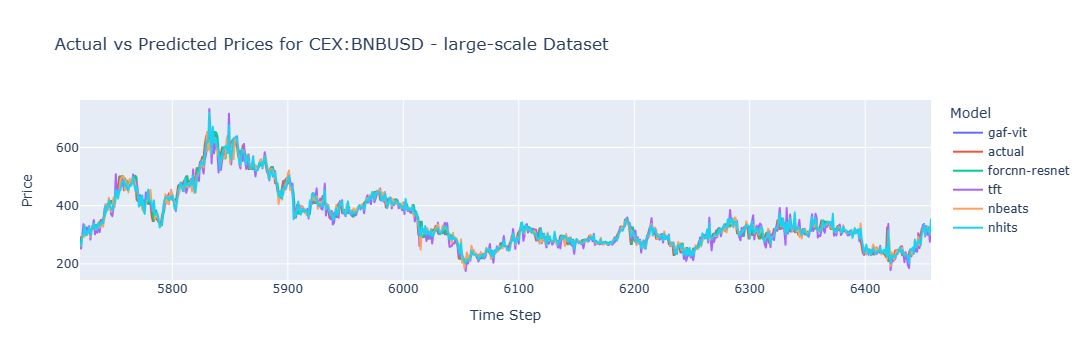

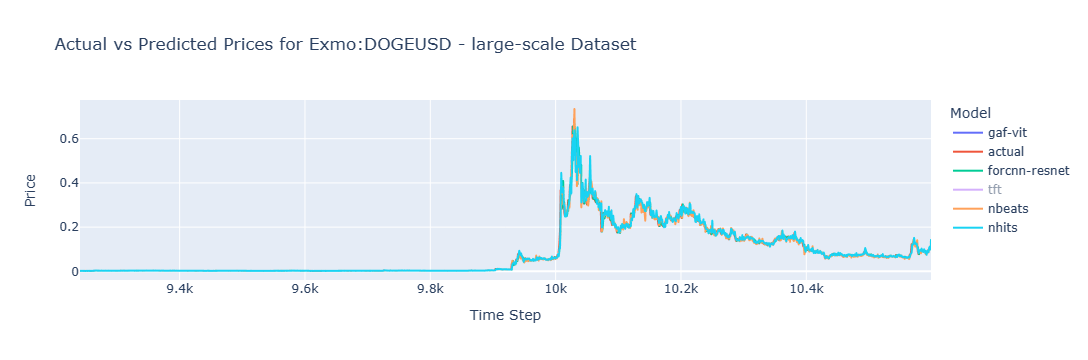

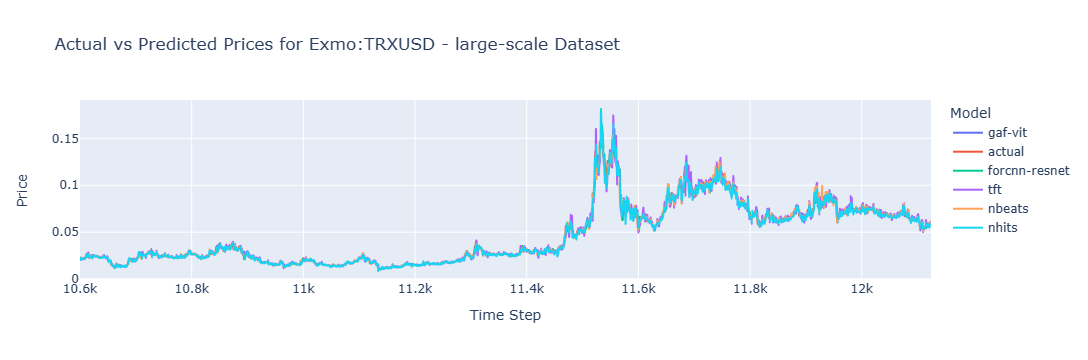

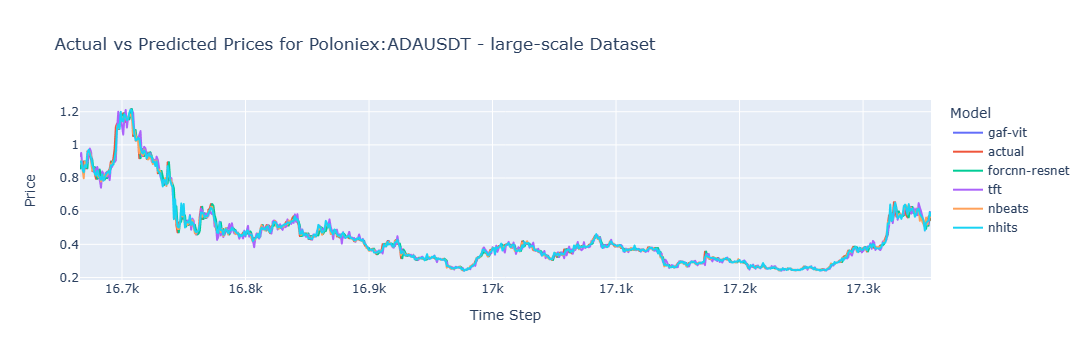

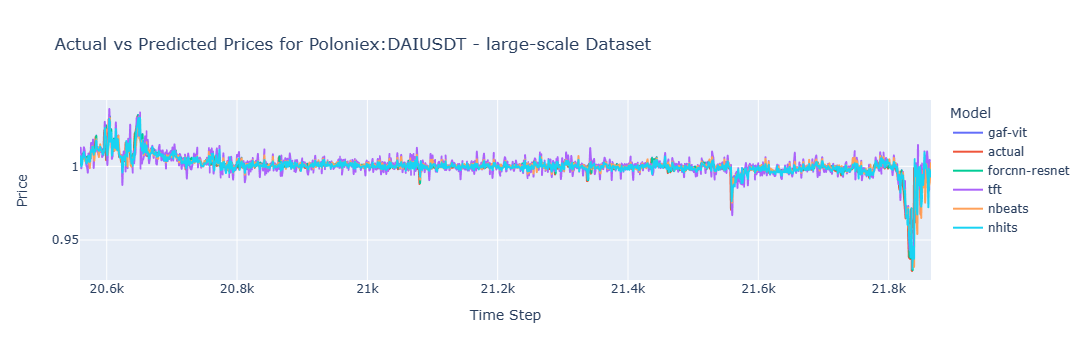

In [35]:
generate_prediction_plots(df=large_df, title='large')

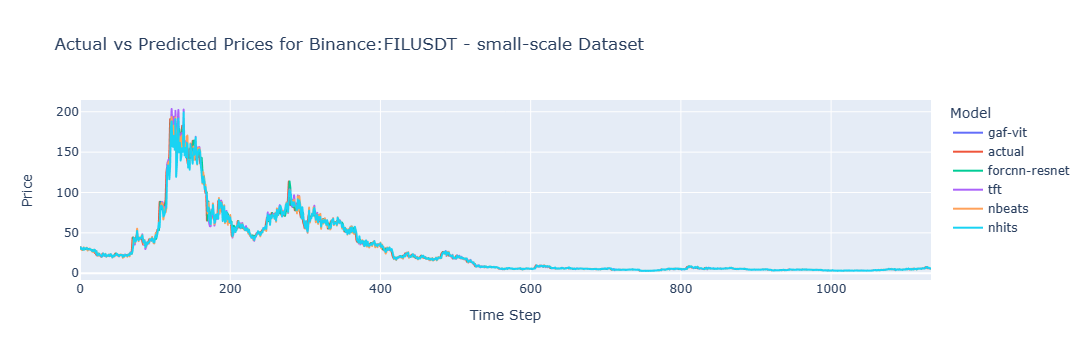

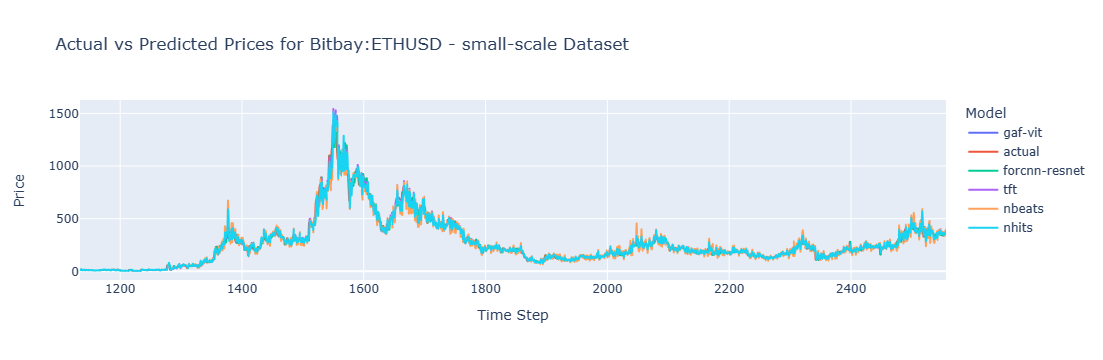

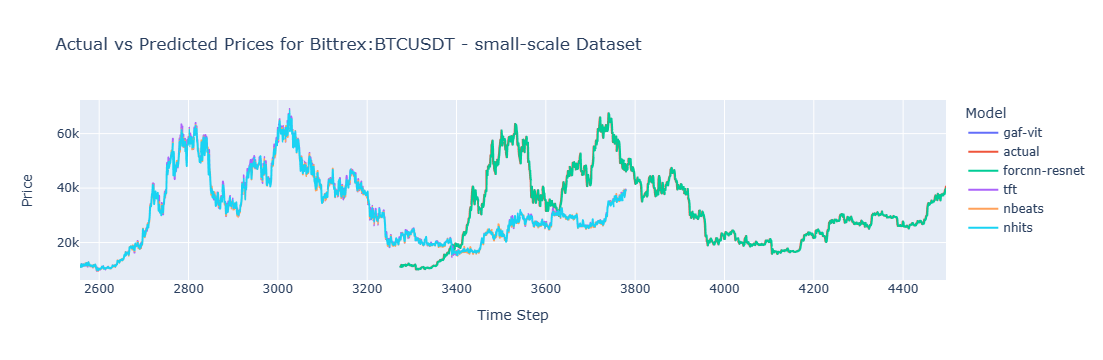

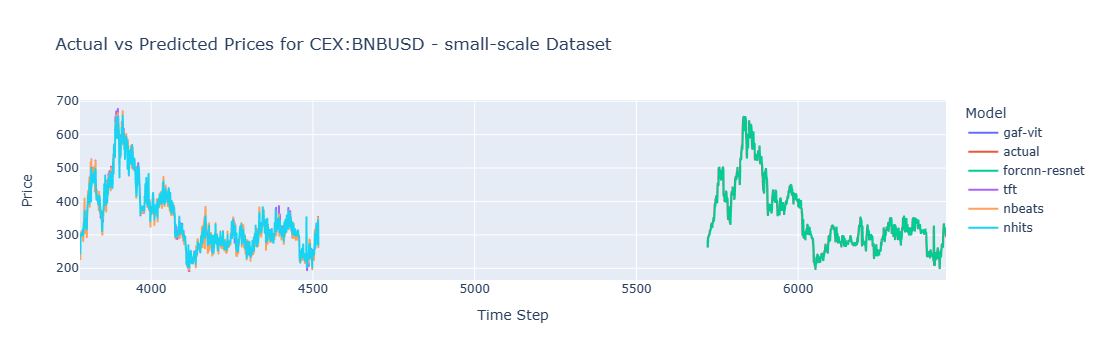

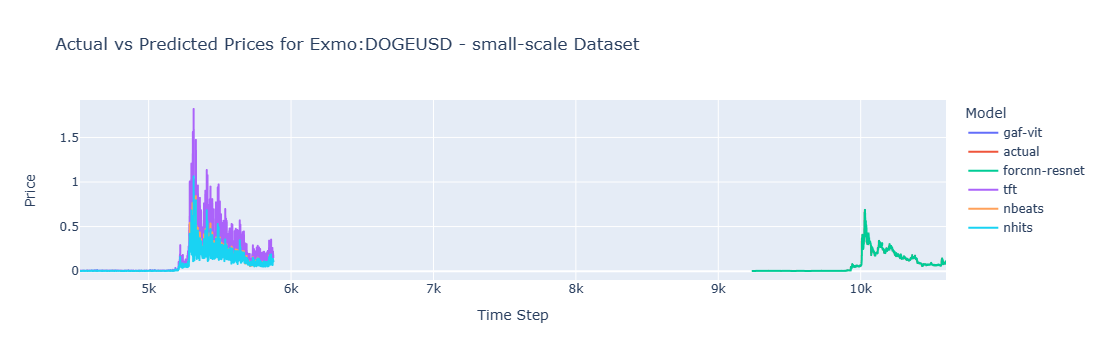

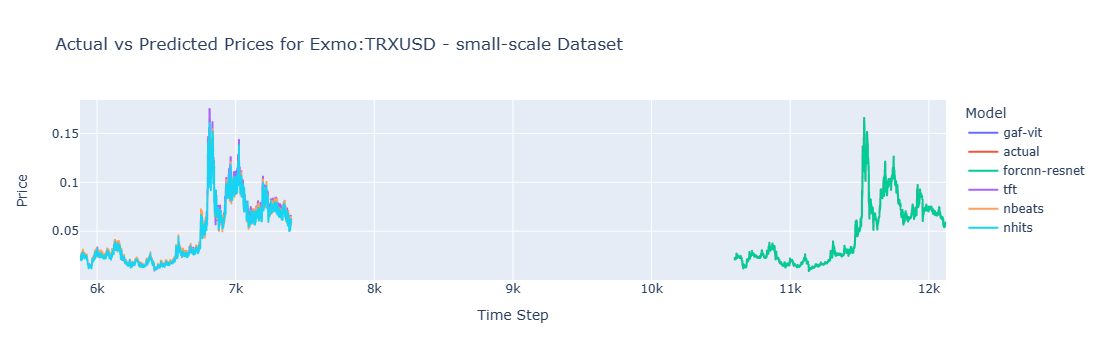

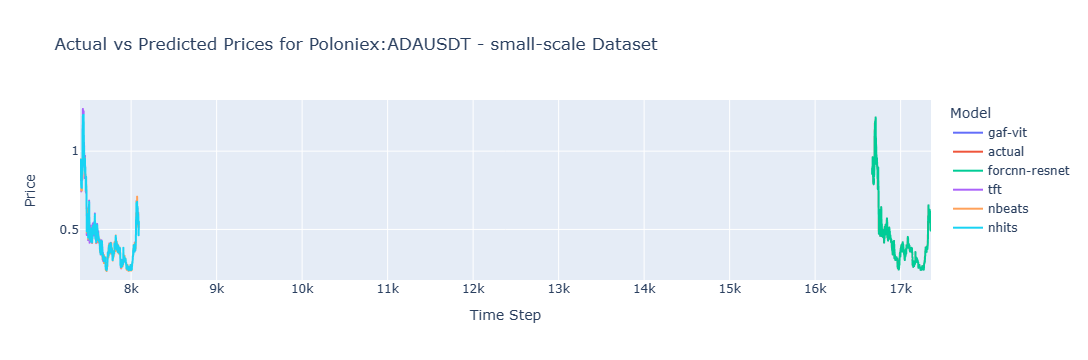

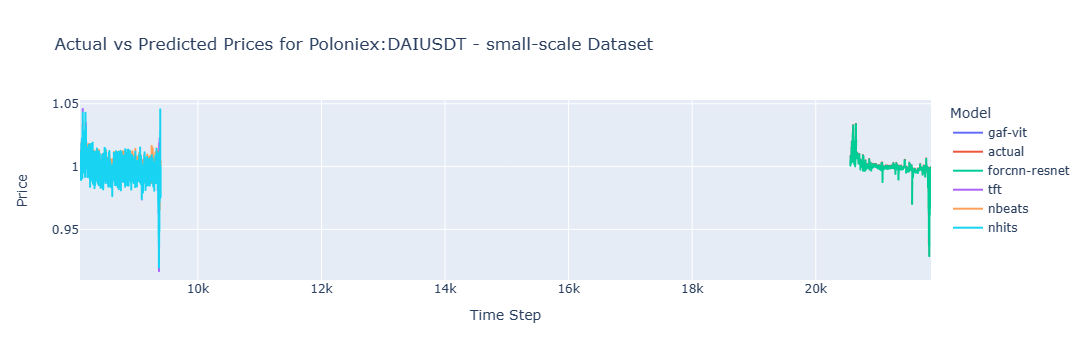

In [36]:
generate_prediction_plots(df=small_df, title='small')